## Basic xform Usage

The combination of `xforms` and `modelspecs` allows for a compact representation of a workflow, from data loading to model fitting to analysis and more. Below is a simple example of how in a few lines of code, this can be achieved.

In [1]:
from pathlib import Path

import nems0.uri
import nems0.recording as recording
import nems0.xform_helper as xhelp

## Download Sample Data

Here we quickly download a sample recording to be used in this example. This data is in the form of a `recording` object, which contains a set of `signals` which are containers for each of the data channels (here, the `stim` and `resp` data that we use in the fit).

In [2]:
# save the demo data the default data directory
signals_dir = nems.get_setting('NEMS_RECORDINGS_DIR')
# download the demo data: cell "TAR010c-18-1"
recording.get_demo_recordings(signals_dir, 'TAR010c-18-1.tgz')
datafile = Path(signals_dir) / 'TAR010c-18-1.tgz'

## Run the Analysis

We specify the name of the analysis we want to run, which consists of a set of keywords for the loader (`ld-sev`), the model (`dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1`), and the fitter (`basic`), and pass that information to the `xform` function which will build the analysis pipeline and fit the model. 

[nems.xform_helper INFO] Initializing modelspec(s) for cell/batch TAR010c-18-1/289...
[nems.xform_helper INFO] TODO: simplify generate_xforms_spec parameters
[nems.xform_helper INFO] Initializing modelspec(s) for recording/model C:\Users\Alex\PycharmProjects\NEMS\recordings\TAR010c-18-1.tgz/ld-sev_dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1_basic...
[nems.xform_helper INFO] [['nems.xforms.init_context', {'cellid': 'TAR010c-18-1', 'batch': 289, 'keywordstring': 'dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1', 'meta': {'batch': 289, 'cellid': 'TAR010c-18-1', 'modelname': 'ld-sev_dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1_basic', 'loader': 'ld-sev', 'fitkey': 'basic', 'modelspecname': 'dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1', 'username': 'nems', 'labgroup': 'lbhb', 'public': 1, 'githash': '', 'recording': 'ld-sev'}, 'recording_uri_list': ['C:\\Users\\Alex\\PycharmProjects\\NEMS\\recordings\\TAR010c-18-1.tgz']}], ['nems.xforms.load_recordings', {'recording_uri_list': ['C:\\Users\\Alex\\PycharmProjects\\NEMS\\reco

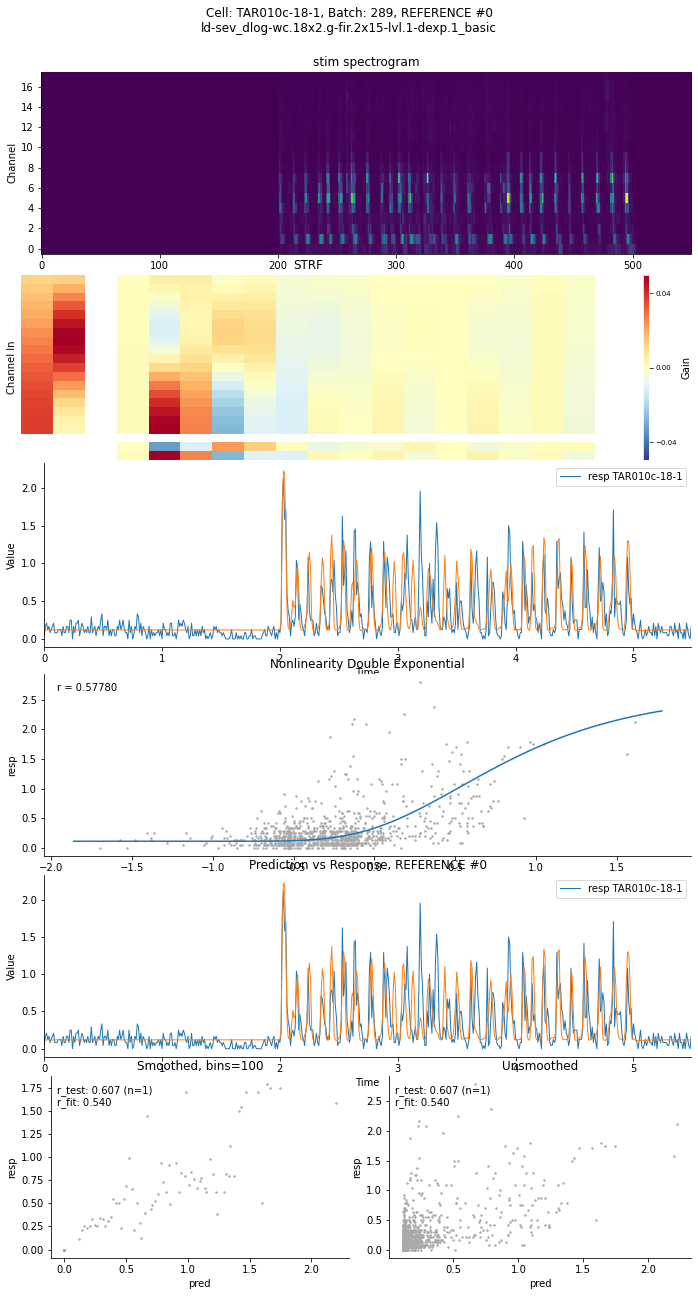

In [3]:
# pass in the relevant information
xfspec, ctx = xhelp.fit_model_xform(
    cellid='TAR010c-18-1',
    batch=289,
    modelname='ld-sev_dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1_basic',
    returnModel=True,
    saveInDB=False,
    recording_uri=str(datafile),
)